# Ensemble Techniques
Combining multiple models to make a bigger complex model
1. Bagging - Random Forest , Multiple trees are created paralelly at random.
2. Boosting - Gradient Boost, XGBoost, - Corrective models are added sequentially 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df["loan_status"].unique()

array([0, 1])

## Target feature - loan_statues
1. 0 - Loan Rejected
2. 1 - Loan Approved

### Step 2 - Perform basic data quality checks

In [5]:
df.shape

(58645, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y(loan_status)
id is just serial number

In [9]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [10]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [11]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

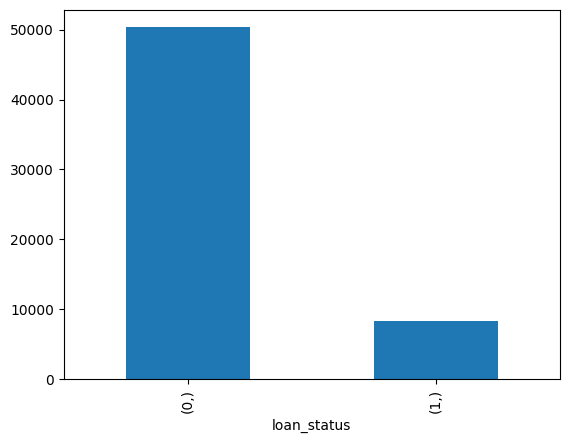

In [13]:
Y.value_counts().plot(kind="bar")

### Step 4 - Perform preprocessing on X

In [14]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [15]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [16]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [17]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [20]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [21]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [22]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5 - Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [24]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ytrain.head()

,loan_status
14337,0
17117,0
32590,0
55811,0
40120,0


In [26]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [28]:
xtrain.shape

(46916, 22)

In [29]:
xtest.shape

(11729, 22)

### Step 6 - Model Building and Tuning

In [31]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=6,
    criterion="gini"
)

model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=1)

In [32]:
model1.score(xtrain, ytrain)

0.8639483331912354

In [33]:
model1.score(xtest, ytest)

0.8622218432943985

In [34]:
from sklearn.metrics import f1_score

In [35]:
ypred_test = model1.predict(xtest)
f1_test = f1_score(ytest, ypred_test, average="macro")
f1_test

0.6911711148043145

### Tune the model with Randomized Search CV 

In [36]:
params1 = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

base_rf = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(base_rf, param_distributions=params1, scoring="f1_macro", cv=5, n_jobs=-1)
rscv_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1_macro')

In [38]:
rscv_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 6}

In [39]:
rscv_rf.best_score_

np.float64(0.8601591281415452)

In [40]:
best_rf = rscv_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=6, min_samples_split=8, n_estimators=200)

In [41]:
best_rf.score(xtrain, ytrain)

0.9420666723505841

In [42]:
best_rf.score(xtest, ytest)

0.9420240429704152

In [43]:
ypred_test_rf = best_rf.predict(xtest)
ypred_test_rf[0:5]

array([0, 0, 0, 0, 0])

In [44]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [46]:
f1_rf = f1_score(ytest, ypred_test_rf, average="macro")
f1_rf

0.8627900914728136

### 2. Gradient Boosting 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
model2 = GradientBoostingClassifier(
    learning_rate=0.001,
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,    
)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [49]:
model2.score(xtrain, ytrain)

0.8570210589138034

In [50]:
model2.score(xtest, ytest)

0.8600051155256203

In [51]:
ypred_test2 = model2.predict(xtest)
ypred_test2[0:5]

array([0, 0, 0, 0, 0])

In [52]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [53]:
f1_2 = f1_score(ytest, ypred_test2, average="macro")
f1_2

0.4623670700403374

### Tuning Gradient boost

In [54]:
params2 = {
    "learning_rate": [0.1, 0.2],
    "n_estimators": [100, 200],
    "max_depth": [3, 4, 5]
}

In [55]:
base_gb = GradientBoostingClassifier()

rscv_gb = RandomizedSearchCV(base_gb, param_distributions=params2, cv=5, scoring="f1_macro", n_jobs=-1)

rscv_gb.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200]},
                   scoring='f1_macro')

In [56]:
rscv_gb.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [57]:
rscv_gb.best_score_

np.float64(0.8911480990996943)

In [58]:
best_gb = rscv_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [59]:
best_gb.score(xtrain, ytrain)

0.9606317674141018

In [60]:
best_gb.score(xtest, ytest)

0.9522550942109301

In [61]:
ypred_test_gb = best_gb.predict(xtest)
ypred_test_gb[0:5]

array([0, 0, 1, 0, 0])

In [62]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [63]:
f1_gb = f1_score(ytest, ypred_test_gb, average="macro")
f1_gb

0.8926132800212412

## XGboost - Extreme Gradient Boosting

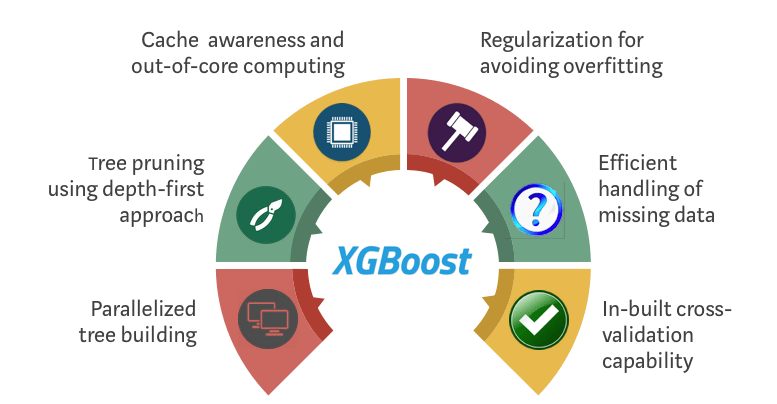

In [64]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.9/150.0 MB 21.0 MB/s eta 0:00:08
   - -------------------------------------- 4.7/150.0 MB 11.4 MB/s eta 0:00:13
   - -------------------------------------- 6.6/150.0 MB 10.6 MB/s eta 0:00:14
   -- ------------------------------------- 8.7/150.0 MB 10.1 MB/s eta 0:00:14
   -- ------------------------------------- 11.0/150.0 MB 10.3 MB/s eta 0:00:14
   ---- ----------------------------------- 15.2/150.0 MB 11.8 MB/s eta 0:00:12
   ---- ----------------------------------- 17.3/150.0 MB 11.5 MB/s eta 0:00:12
   ----- ---------------------------------- 19.4/150.0 MB 11.2 MB/s eta 0:00:12
   ----- ---------------------------------- 21.5/150.0 MB 11.2 MB/s eta 0:00:12
   ------ --------------------------------- 23.9/150.0 MB 11.2 MB/s eta 0:00:12
   ------- -------------------------------- 27.8/150.0 MB 11.8 MB/s eta 0:00:11
   ------- -------------------------------- 29.9/150.

In [72]:
from xgboost import XGBClassifier

In [80]:
model_xgb = XGBClassifier(max_depth=4)
model_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
model_xgb.score(xtrain, ytrain)

0.9561556824963765

In [82]:
model_xgb.score(xtest, ytest)

0.9515730241282292

In [83]:
ypred_test_xgb = model_xgb.predict(xtest)
ypred_test_xgb[0:5]

array([0, 0, 0, 0, 0])

In [84]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [85]:
f1_xgb = f1_score(ytest, ypred_test_xgb, average="macro")
f1_xgb

0.8913894372070791

In [86]:
from sklearn.model_selection import cross_val_score

f1_cv_xgb = cross_val_score(model_xgb, xtrain, ytrain, cv=5, scoring="f1_macro")
f1_cv_xgb

array([0.88335372, 0.88235542, 0.90013649, 0.89282728, 0.88660066])

In [87]:
f1_cv_xgb.mean()

np.float64(0.8890547143605698)

### From above i can say Gradient boosting has highest f1 cross validated score of 0.8911
### Select Gradient boost for out of sample prediction

### Step 7 - Perform evaluation on Selected model

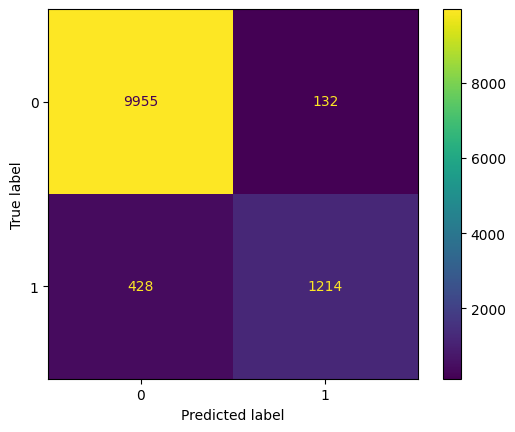

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_gb, xtest, ytest)

In [91]:
ypred_test_gb[0:5]

array([0, 0, 1, 0, 0])

In [92]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test_gb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### Because f1_macro > 0.80 hence model is good for out of sample prediction

### Show feature importances

In [93]:
best_gb.feature_importances_

array([9.96279755e-03, 7.78442519e-02, 4.12204795e-02, 9.35593328e-03,
       1.20955702e-01, 3.20291780e-01, 3.34495128e-03, 9.60178536e-04,
       1.03647632e-02, 1.64435248e-01, 9.09043848e-03, 2.09015847e-02,
       2.40520266e-02, 1.17817360e-02, 9.70152623e-03, 7.61082762e-04,
       1.55166805e-02, 1.41471841e-01, 6.57976579e-03, 1.59933700e-04,
       5.99189103e-05, 1.18738070e-03])

In [94]:
xtrain.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership_OTHER',
       'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_B', 'cat__loan_grade_C',
       'cat__loan_grade_D', 'cat__loan_grade_E', 'cat__loan_grade_F',
       'cat__loan_grade_G', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [95]:
imp = pd.Series(best_gb.feature_importances_, index = xtrain.columns)
imp

num__person_age                     0.009963
num__person_income                  0.077844
num__person_emp_length              0.041220
num__loan_amnt                      0.009356
num__loan_int_rate                  0.120956
num__loan_percent_income            0.320292
num__cb_person_cred_hist_length     0.003345
cat__person_home_ownership_OTHER    0.000960
cat__person_home_ownership_OWN      0.010365
cat__person_home_ownership_RENT     0.164435
cat__loan_intent_EDUCATION          0.009090
cat__loan_intent_HOMEIMPROVEMENT    0.020902
cat__loan_intent_MEDICAL            0.024052
cat__loan_intent_PERSONAL           0.011782
cat__loan_intent_VENTURE            0.009702
cat__loan_grade_B                   0.000761
cat__loan_grade_C                   0.015517
cat__loan_grade_D                   0.141472
cat__loan_grade_E                   0.006580
cat__loan_grade_F                   0.000160
cat__loan_grade_G                   0.000060
cat__cb_person_default_on_file_Y    0.001187
dtype: flo

In [98]:
imp.sort_values(ascending=False)

num__loan_percent_income            0.320292
cat__person_home_ownership_RENT     0.164435
cat__loan_grade_D                   0.141472
num__loan_int_rate                  0.120956
num__person_income                  0.077844
num__person_emp_length              0.041220
cat__loan_intent_MEDICAL            0.024052
cat__loan_intent_HOMEIMPROVEMENT    0.020902
cat__loan_grade_C                   0.015517
cat__loan_intent_PERSONAL           0.011782
cat__person_home_ownership_OWN      0.010365
num__person_age                     0.009963
cat__loan_intent_VENTURE            0.009702
num__loan_amnt                      0.009356
cat__loan_intent_EDUCATION          0.009090
cat__loan_grade_E                   0.006580
num__cb_person_cred_hist_length     0.003345
cat__cb_person_default_on_file_Y    0.001187
cat__person_home_ownership_OTHER    0.000960
cat__loan_grade_B                   0.000761
cat__loan_grade_F                   0.000160
cat__loan_grade_G                   0.000060
dtype: flo

<Axes: >

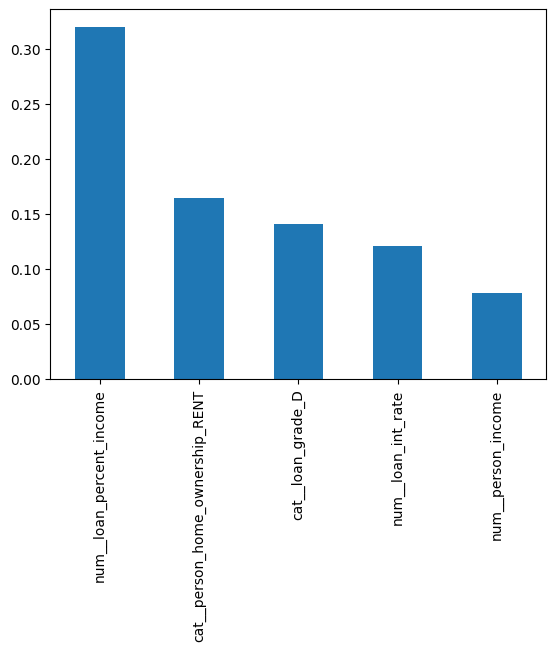

In [102]:
imp.sort_values(ascending=False).head().plot(kind="bar")

### Out of sample prediction

In [103]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [104]:
xnew.shape

(39098, 12)

In [105]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [106]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [108]:
preds = best_gb.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [112]:
probs = best_gb.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.99868323, 0.02311664, 0.60443897, 0.00939841, 0.0650408 ])

In [110]:
best_gb.classes_

array([0, 1])

In [114]:
res = xnew[["id"]]
res["loan_status"] = preds
res["prob"] = probs

In [116]:
res = res.round(4)
res

,id,loan_status,prob
0,58645,1,0.9987
1,58646,0,0.0231
2,58647,1,0.6044
3,58648,0,0.0094
4,58649,0,0.0650
...,...,...,...
39093,97738,0,0.0589
39094,97739,0,0.0082
39095,97740,0,0.0120
39096,97741,0,0.1262


In [117]:
res["loan_status"].value_counts()

loan_status
0    34793
1     4305
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

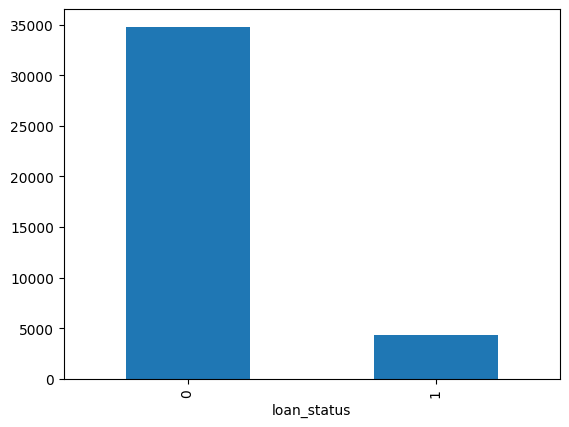

In [118]:
res["loan_status"].value_counts().plot(kind="bar")

In [119]:
res.to_csv("Results.csv", index=False)

### Step 9 - Save the model and preprocessor

In [120]:
%pip install joblib

In [121]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [122]:
best_gb

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [123]:
import joblib
joblib.dump(best_gb, "loan_model.joblib")

['loan_model.joblib']

In [124]:
joblib.dump(pre, "loan_pre.joblib")

['loan_pre.joblib']

### Loading models

In [125]:
p = joblib.load("loan_pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [126]:
m = joblib.load("loan_model.joblib")
m

GradientBoostingClassifier(max_depth=5, n_estimators=200)